# Journal 02: Manufacturing a "Fake" Stock Market

The aim of this journal is to create a simulated stock market with a range of stocks within a few stock price ranges. From here we will save this data for future use. The data will mimic a months worth of time, so roughly ~30 'days' or data points per stock. With `continue_data()`, this can easily be extended in the future.

Eventually, this data will be housed in an 'environment' within which an agent will be designed to act within (using a Reinforcement Learning approach).

## Creating a Starting Stock

This is just to make sure that saving a stock is feasible, and easy

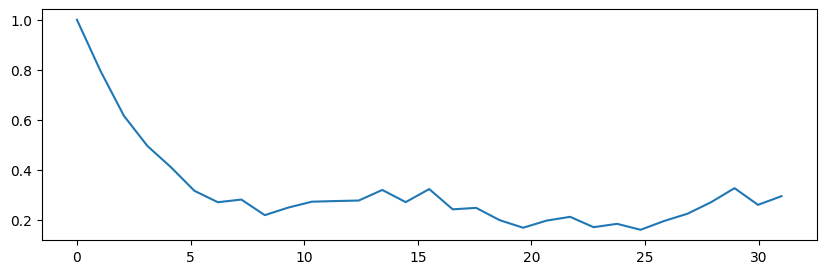

In [304]:
import numpy as np
import matplotlib.pyplot as plt
import data_gen as dg
import stock_analysis as sa

initial = dg.generate_data(30, 0.25)
init_indices = np.linspace(0, len(initial), len(initial))

plt.figure(figsize=(10, 3))
plt.plot(init_indices, initial)
plt.show()


In [305]:
print(initial)

[1, 0.796063793039542, 0.616485093721975, 0.49615699558559423, 0.4114446464095033, 0.3171462564772862, 0.2714726144266833, 0.28209770719249305, 0.21990120631925156, 0.25014605837736803, 0.2735622746213239, 0.27612621959025424, 0.278245676590823, 0.32051862857000746, 0.2719209712854737, 0.32403017630965286, 0.24313921328465365, 0.24888203449388716, 0.19981039442509602, 0.1696402161023436, 0.19813365414938383, 0.21316625115002139, 0.17182577893116646, 0.1851834978403433, 0.1614549297780754, 0.19646521394415517, 0.22564589263379214, 0.2714748538029709, 0.3276614526023789, 0.2610377293010123, 0.29562766457903633]


In [306]:
import pandas as pd

stock1 = pd.DataFrame(np.array(initial), columns=['Value'])

stock1.head()

,Value
0,1.000000
1,0.796064
2,0.616485
3,0.496157
4,0.411445


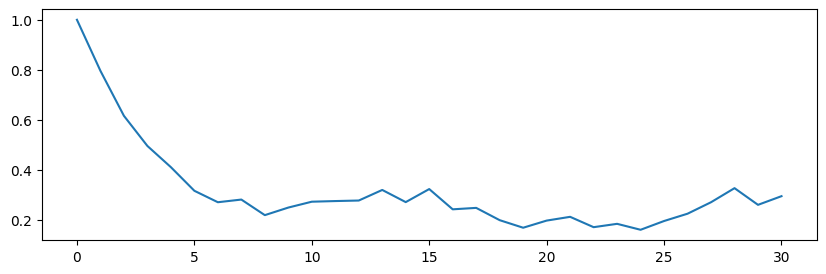

In [307]:
plt.figure(figsize=(10, 3))
plt.plot(stock1)

In [308]:
import os
os.makedirs('fake_stocks/', exist_ok=True)
stock1.to_csv('fake_stocks/stock1.csv')

## Modifying `generate_data()` to Account for Changes in Volatility

This function now allows for fluctuating volatility. It is intended to keep this moving value within the range of $10\% \geq vol \leq 20\%$, where $vol$ is the current volatility of the market.

The current implementation makes use of `np.random.choice` to determine whether $vol$ increases or decreases. If $vol$ falls short of $10\%$ or exceeds $20\%$, it shifts the probability of either increasing or decreasing back towards the desired range, if $vol$ is otherwise within the desired range, the probabilty resets back to a distribution of $p = [0.3, 0.4, 0.3]$, where each probability corresponds to the following directions $d = [-1, 0, 1]$



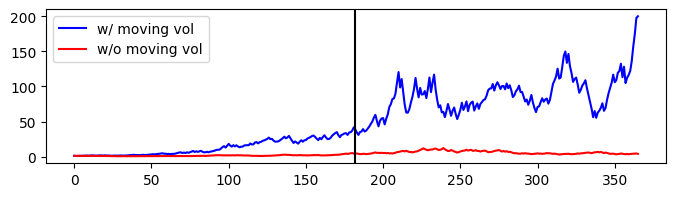

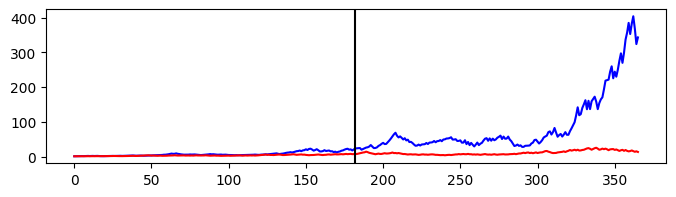

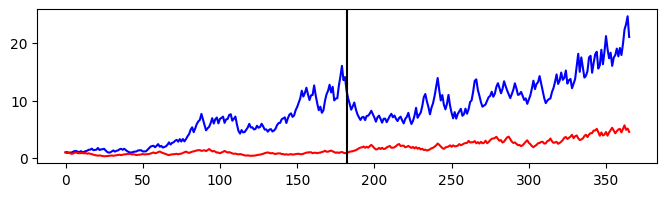

In [309]:
def generate_data(numVals, volatility, init_val=1, moving_vol=True):
    rng = np.random.default_rng()
    
    vals = [init_val]
    vols = [volatility]

    for x in range(numVals):
        rnd = rng.random()
        change_percent = 1.5 * volatility * rnd
        if change_percent > volatility:
            change_percent -= (2 * volatility)
        change_amount = vals[x] * change_percent
        vals.append(vals[x] + change_amount)

        if moving_vol:
            if volatility >= 0.2:
                # print("Volatility over 20%:    ", volatility)
                p = [0.80, 0.10, 0.10]
            elif volatility <= 0.1:
                # print("Volatility under 10%:   ", volatility)
                p = [0.10, 0.10, 0.80]
            else:
                p = [0.30, 0.40, 0.30]

            vol_change = rng.random()
            vol_direction = np.random.choice([-1, 0, 1], p=p)
            volatility += vol_change * vol_direction * 0.03
            vols.append(volatility)
            
            # print('\nvol_change:    ', vol_change)
            # print('vol_direction:    ', vol_direction)
            # print('volatility:      ', volatility)

    # print('Volatilities: ', vols)
        
    return vals


numVals = 365
for x in range(3):
    with_moving_vol = generate_data(numVals, 0.15, moving_vol=True);
    without_moving_vol = generate_data(numVals, 0.15, moving_vol=False);

    plt.figure(figsize=(8, 2))
    plt.plot(with_moving_vol, color='blue', label='w/ moving vol')
    plt.plot(without_moving_vol, color='red', label='w/o moving vol')
    plt.axvline(int(numVals / 2), color='black')
    if x == 0:
        plt.legend(loc='upper left')
    plt.show()

Moving Vol? True


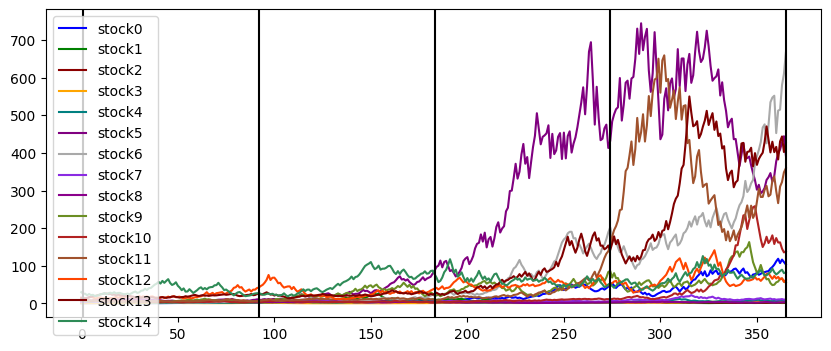

Moving Vol? True


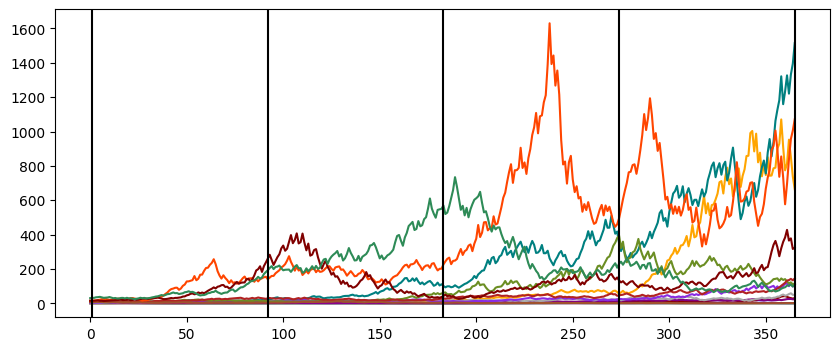

Moving Vol? False


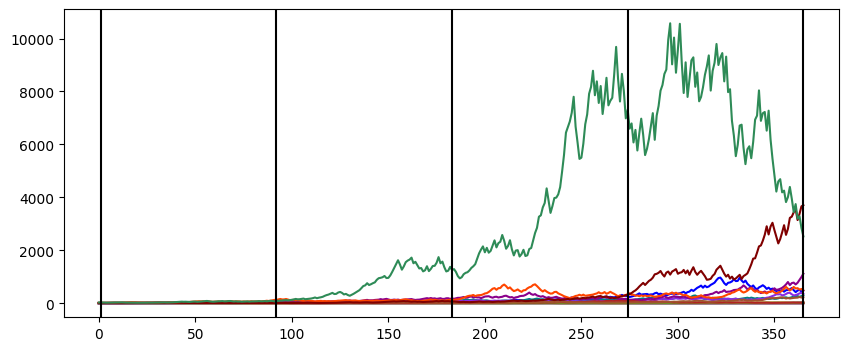

Moving Vol? False


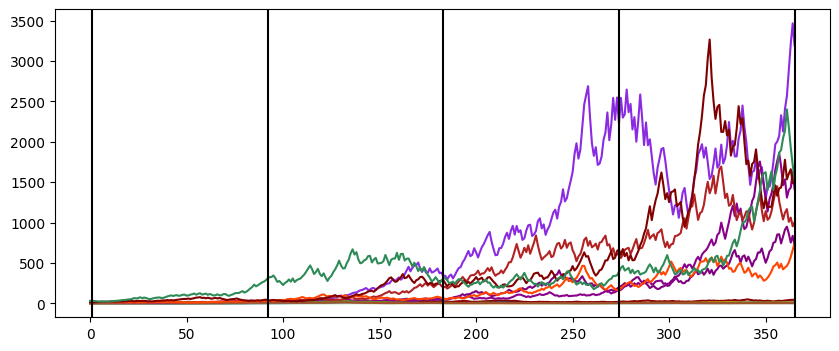

In [310]:
moving_vol_bool = [True, True, False, False]
numStocks = 15
numVals = 365
numCharts = 4


c = ['blue', 'green', 'darkred', 'orange', 'teal', 
     'purple', 'darkgrey', 'blueviolet', 'darkmagenta', 'olivedrab',
     'firebrick',  'sienna', 'orangered', 'maroon', 'seagreen']
initial_stock_val = [1, 1, 1, 1, 4, 4, 4, 4, 8, 8, 10, 10, 15, 15, 30, 30, 50]

for x in range(numCharts):
    print('Moving Vol?', moving_vol_bool[x])

    plt.figure(figsize=(10, 4))
    for y in range(numStocks):
        stock_y = generate_data(numVals, 0.15, init_val=initial_stock_val[y], moving_vol=moving_vol_bool[x]);
        plt.plot(stock_y, color=c[y], label='stock{0}'.format(y))
    
    quarters = np.arange(0, numVals+1, int(numVals/4))

    for quarter in quarters:
        plt.axvline(quarter+1, color='black')
    if x == 0:
        plt.legend(loc='upper left')
    plt.show()

In [311]:
def create_stocks(numStocks, numVals, startingVal, moving_vol=True):
    for x in range(numStocks):
        os.makedirs('fake_stocks/stock_start_{0}/moving_vol_{1}'.format(startingVal, moving_vol), exist_ok=True)
        stock_data = generate_data(numVals, volatility=0.15, init_val=startingVal, moving_vol=moving_vol)

        stock = pd.DataFrame(np.array(stock_data), columns=['Value'])
        stock.to_csv('fake_stocks/stock_start_{0}/moving_vol_{1}/stock{2}_numVal{3}.csv'.format(startingVal, moving_vol, x, numVals))


price_ranges = [0.5, 3, 25, 75, 100]
moving_vols = [True, False]

def generate_stock_market(num_stocks, num_vals, price_ranges, moving_vols):
    for price in price_ranges:
        for mv in moving_vols:
            create_stocks(num_stocks, num_vals, price, moving_vol=mv)

generate_stock_market(5, 365, price_ranges, moving_vols)